In [2]:
# Cybersecurity Project: Detecting Malicious Messages in Email Data

import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud
import re
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns


nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load Dataset (SpamHam as malicious/non-malicious)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/spamham.csv')
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Mark 'spam' as malicious, 'ham' as safe for cybersecurity context
df['label'] = df['label'].map({'spam': 1, 'ham': 0})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


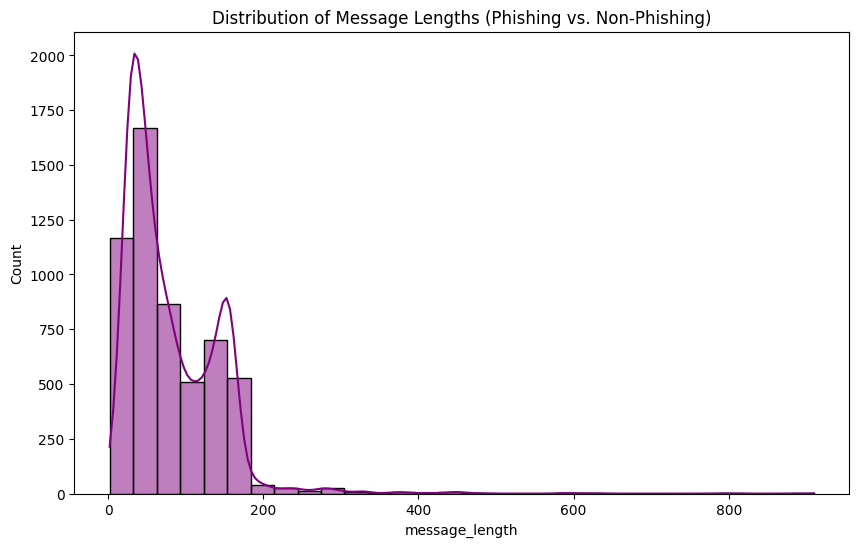

In [3]:
# Preprocessing Function: Basic Cleaning (removing URLs, lowering case, tokenizing)
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_message'] = df['message'].apply(clean_text)

# Visualizing the message length distribution
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Message Lengths (Phishing vs. Non-Phishing)')
plt.show()


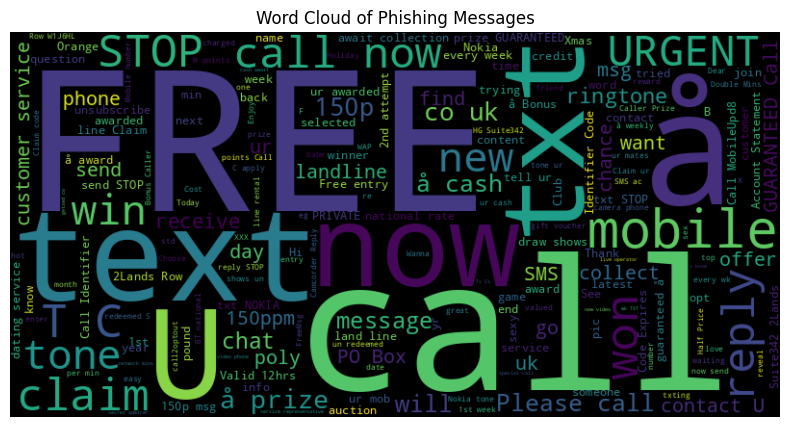

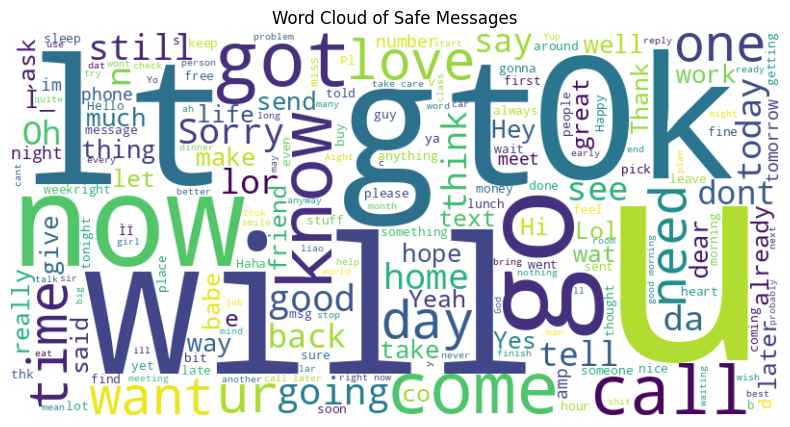

In [4]:
# Generating word clouds for phishing and non-phishing messages
phishing_messages = df[df['label'] == 1]['message']
non_phishing_messages = df[df['label'] == 0]['message']

wordcloud_phishing = WordCloud(width=800, height=400, background_color='black').generate(' '.join(phishing_messages))
wordcloud_safe = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_phishing_messages))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_phishing, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Phishing Messages")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_safe, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Safe Messages")
plt.show()


In [5]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 4. Define a function to display metrics and confusion matrix
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


--- SVM ---
Accuracy: 0.9766816143497757
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



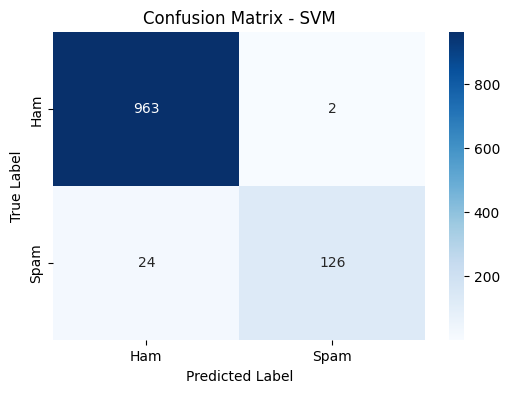

In [7]:

# 1. Train and Evaluate the SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


# Evaluate SVM model
evaluate_model(y_test, y_pred_svm, "SVM")

--- Random Forest ---
Accuracy: 0.9766816143497757
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



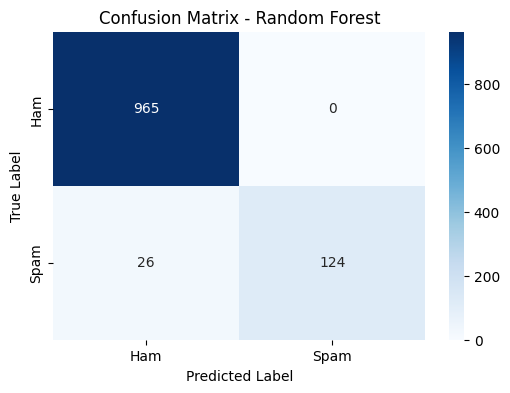

In [8]:
# 2. Train and Evaluate the Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Naive bayes ---
Accuracy: 0.9766816143497757
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



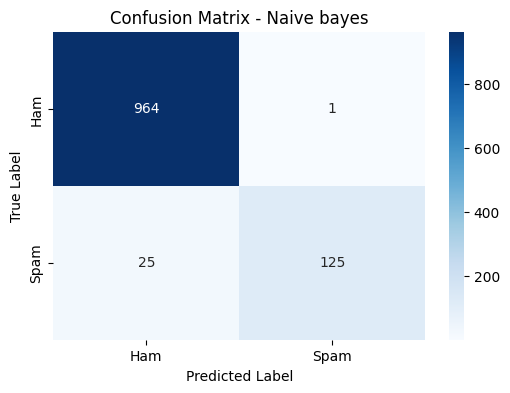

In [9]:
# 3. Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Evaluate Naive bayes model
evaluate_model(y_test, y_pred, "Naive bayes")

<ipython-input-10-324319d4e77c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='Set2')


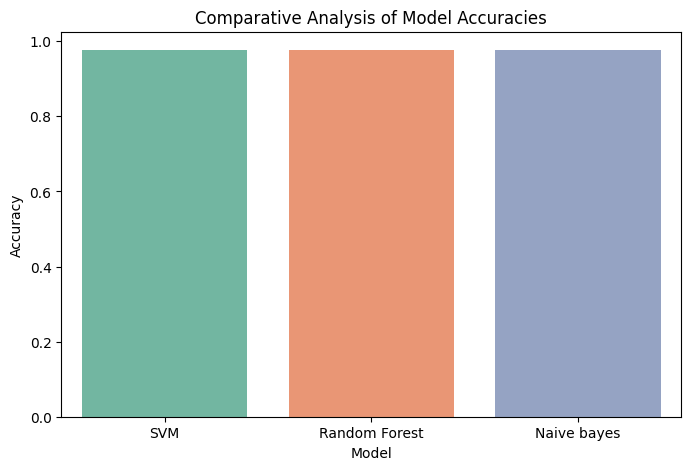

In [10]:
# 5. Comparative Analysis of Models

# Compile the accuracies into a dictionary for easy comparison
model_performance = {
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Naive bayes' : accuracy_score(y_test, y_pred)
}

# Convert the dictionary into a DataFrame for easier plotting
performance_df = pd.DataFrame(list(model_performance.items()), columns=['Model', 'Accuracy'])

# Plot the model comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=performance_df, palette='Set2')
plt.title('Comparative Analysis of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()
